<a href="https://colab.research.google.com/github/Piyush42Soni/Monument-Detection-System/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
AKSHARDHAM_dir = os.path.join('/content/drive/MyDrive/train/AKSHARDHAM_IMAGES')
india_gate_dir = os.path.join('/content/drive/MyDrive/train/india_gate')
lotus_temple_dir = os.path.join("/content/drive/MyDrive/train/loutus_temple")
qutub_minar_dir = os.path.join('/content/drive/MyDrive/train/qutub_minar')
RED_FORT_dir = os.path.join('/content/drive/MyDrive/train/RED FORT')

AKSHARDHAM_val_dir = os.path.join('/content/drive/MyDrive/validation/AKSHARDHAM_IMAGES')
india_gate_val_dir = os.path.join('/content/drive/MyDrive/validation/india_gate')
lotus_temple_val_dir = os.path.join("/content/drive/MyDrive/validation/loutus_temple")
qutub_minar_val_dir = os.path.join('/content/drive/MyDrive/validation/qutub_minar')
RED_FORT_val_dir = os.path.join('/content/drive/MyDrive/validation/RED FORT')

num_AKSHARDHAM_train=len(os.listdir(AKSHARDHAM_dir))
num_india_gate_train=len(os.listdir(india_gate_dir))
num_lotus_temple_train=len(os.listdir(lotus_temple_dir))
num_qutub_minar_train=len(os.listdir(qutub_minar_dir))
num_RED_FORT_train=len(os.listdir(RED_FORT_dir))

num_AKSHARDHAM_val=len(os.listdir(AKSHARDHAM_val_dir))
num_india_gate_val=len(os.listdir(india_gate_val_dir))
num_lotus_temple_val=len(os.listdir(lotus_temple_val_dir))
num_qutub_minar_val=len(os.listdir(qutub_minar_val_dir))
num_RED_FORT_val=len(os.listdir(RED_FORT_val_dir))

AKSHARDHAM_files = os.listdir(AKSHARDHAM_dir)
india_gate_files = os.listdir(india_gate_dir)
lotus_temple_files = os.listdir(lotus_temple_dir)
qutub_minar_files = os.listdir(qutub_minar_dir)
RED_FORT_files = os.listdir(RED_FORT_dir)

num_AKSHARDHAM_total=num_AKSHARDHAM_train+num_AKSHARDHAM_val
num_india_gate_total=num_india_gate_train+num_india_gate_val
num_lotus_temple_total=num_lotus_temple_train+num_lotus_temple_val
num_qutub_minar_total=num_qutub_minar_train+num_qutub_minar_val
num_RED_FORT_total=num_RED_FORT_train+num_RED_FORT_val

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt
import numpy as np
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [4]:
import os
from PIL import Image
folder_path = '/content/drive/MyDrive/train'
extensions = []
for fldr in os.listdir(folder_path):
    sub_folder_path = os.path.join(folder_path, fldr)
    for filee in os.listdir(sub_folder_path):
        file_path = os.path.join(sub_folder_path, filee)
        print('** Path: {}  **'.format(file_path), end="\r", flush=True)
        im = Image.open(file_path)
        im = im.resize((150,150),Image.ANTIALIAS)
        rgb_im = im.convert('RGB')
        rgb_im.save(file_path,quality=95,optimize=True)
        if filee.split('.')[1] not in extensions:
            extensions.append(filee.split('.')[1])

In [5]:
import os
from PIL import Image
folder_path = '/content/drive/MyDrive/validation'
extensions = []
for fldr in os.listdir(folder_path):
    sub_folder_path = os.path.join(folder_path, fldr)
    for filee in os.listdir(sub_folder_path):
        file_path = os.path.join(sub_folder_path, filee)
        print('** Path: {}  **'.format(file_path), end="\r", flush=True)
        im = Image.open(file_path)
        im = im.resize((150,150),Image.ANTIALIAS)
        rgb_im = im.convert('RGB')
        rgb_im.save(file_path,quality=95,optimize=True)
        if filee.split('.')[1] not in extensions:
            extensions.append(filee.split('.')[1])

In [6]:
BATCH_SIZE = 100  # Number of training examples to process before updating our models variables
IMG_SHAPE  = 150  # Our training data consists of images with width of 150 pixels and height of 150 pixels

In [9]:
training_datagen      = ImageDataGenerator(rescale=1./255)  # Generator for our training data
validation_datagen = ImageDataGenerator(rescale=1./255)  # Generator for our validation data

In [6]:
TRAINING_DIR = "/content/drive/MyDrive/train/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/content/drive/MyDrive/validation/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150, 150),
  shuffle=True,
	class_mode='categorical',
  batch_size=120
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150, 150),
  shuffle=False,
	class_mode='categorical',
  batch_size=16
)

Found 2282 images belonging to 5 classes.
Found 704 images belonging to 5 classes.


In [13]:
sample_training_images, _ = next(train_generator) 

In [11]:

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

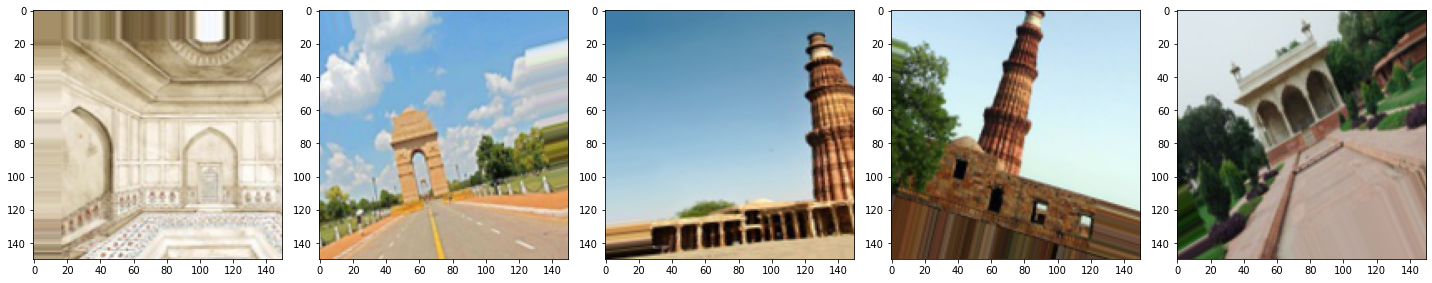

In [14]:
plotImages(sample_training_images[:5])  # Plot images 0-4


In [7]:

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation="softmax")
])

model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs=50, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=1)

model.save("train.h5")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

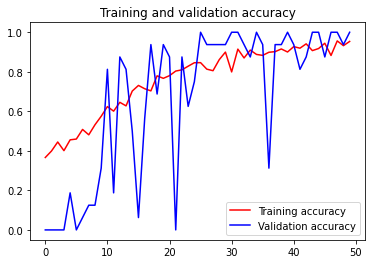

<Figure size 432x288 with 0 Axes>

In [8]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [23]:
from PIL import Image
from keras.preprocessing import image
img = Image.open("/content/drive/MyDrive/Delhi_fort.jpg")
img=img.resize((150,150),Image.ANTIALIAS)
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
model.predict(img)

array([[0., 1., 0., 0., 0.]], dtype=float32)